In [ ]:
# Instala√ß√£o das bibliotecas necess√°rias
!pip install numpy==1.23.5 pgmpy==0.1.21

**!!! Ap√≥s executar a c√©lula acima, v√° em `Runtime > Restart runtime`. Depois, execute as pr√≥ximas c√©lulas. !!!**

In [ ]:
# Importa√ß√µes
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import networkx as nx

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
from pgmpy.inference import VariableElimination


In [ ]:
# Carregamento da base
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Dados_Completos.csv")

Saving Dados_Completos.csv to Dados_Completos.csv


para fazer a an√°lise outros cultivos basta mudar a rela√ß√£o do 'Produto'

In [ ]:
# Filtragem para trigo
df_trigo = df[df['Produto'] == '1.17 Trigo'].dropna()

colunas = [
    'Temperatura Media',
    'Precipitacao Total',
    'Pressao Atmosferica Media',
    'Vento Velocidade Media',
    'Rendimento M√©dio (kg/ha)'
]

df_trigo = df_trigo[colunas]
df_trigo.head()

Temperatura Media  Precipitacao Total  Pressao Atmosferica Media  \
1195              22.92              201.13                     946.27   
1204              23.00              130.08                     946.48   
1213              20.56              167.13                     946.92   
1222              18.75              112.82                     949.04   
1231              14.94              108.53                     787.51   

      Vento Velocidade Media  Rendimento M√©dio (kg/ha)  
1195                    2.36                    2726.0  
1204                    2.64                    3109.0  
1213                    2.25                    3109.0  
1222                    2.24                    3187.0  
1231                    1.43                    3187.0

['1.4 Arroz' '1.8 Feijao (1 Safra)' '1.9 Feijao (2 Safra)'
 '1.10 Feijao (3 Safra)' '1.13 Milho (1 Safra)' '1.14 Milho (2 Safra)'
 '1.15 Soja' '1.17 Trigo' '15 Fumo']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


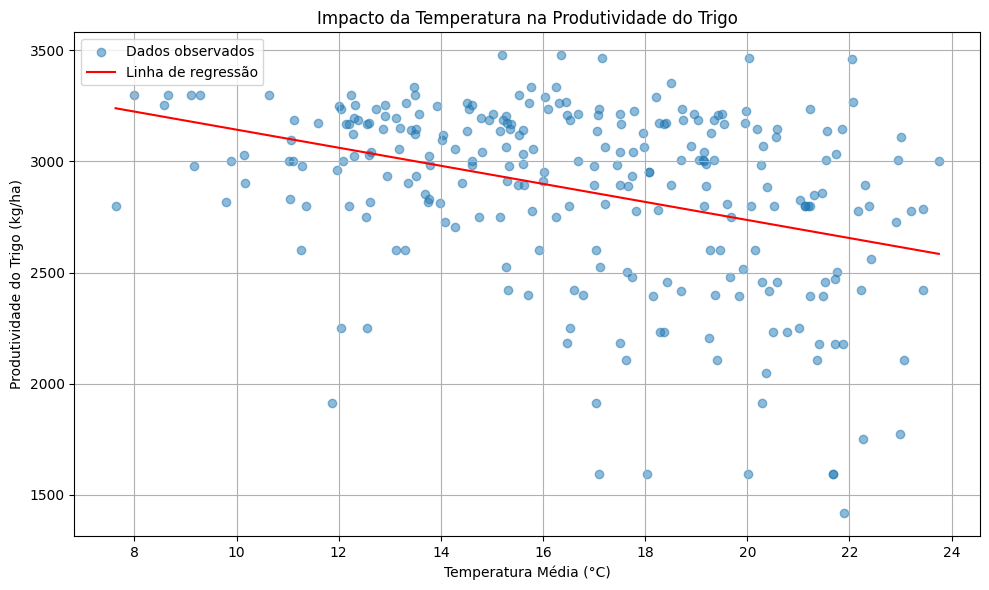

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Confirmar valor correto na base
print(df['Produto'].unique())  # Use para verificar caso necess√°rio

# Filtrar os dados corretamente para TRIGO
df_trigo = df[df['Produto'] == '1.17 Trigo'].dropna()

# Selecionar colunas necess√°rias
colunas = [
    'Temperatura Media',
    'Precipitacao Total',
    'Pressao Atmosferica Media',
    'Vento Velocidade Media',
    'Rendimento M√©dio (kg/ha)'
]
df_trigo = df_trigo[colunas]

# Aplicar regress√£o linear usando apenas Temperatura
X_trigo = df_trigo[['Temperatura Media']]
y_trigo = df_trigo['Rendimento M√©dio (kg/ha)']

# Checar se h√° dados suficientes
if len(X_trigo) > 0:
    modelo_trigo = LinearRegression()
    modelo_trigo.fit(X_trigo, y_trigo)

    # Coeficiente e intercepto
    coef_temp_trigo = modelo_trigo.coef_[0]
    intercepto_trigo = modelo_trigo.intercept_

    # Simular previs√µes para o intervalo de temperatura
    temperaturas_simuladas_trigo = np.linspace(X_trigo.min(), X_trigo.max(), 100).reshape(-1, 1)
    produtividade_prevista_trigo = modelo_trigo.predict(temperaturas_simuladas_trigo)

    # Plotar gr√°fico
    plt.figure(figsize=(10, 6))
    plt.scatter(X_trigo, y_trigo, alpha=0.5, label='Dados observados')
    plt.plot(temperaturas_simuladas_trigo, produtividade_prevista_trigo, color='red', label='Linha de regress√£o')
    plt.xlabel("Temperatura M√©dia (¬∞C)")
    plt.ylabel("Produtividade do Trigo (kg/ha)")
    plt.title("Impacto da Temperatura na Produtividade do Trigo")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    coef_temp_trigo, intercepto_trigo
else:
    print("Nenhum dado encontrado para o produto")


In [ ]:
# Filtragem para trigo
df_trigo = df[df['Produto'] == '1.17 Trigo'].dropna()

colunas = [
    'Temperatura Media',
    'Precipitacao Total',
    'Pressao Atmosferica Media',
    'Vento Velocidade Media',
    'Rendimento M√©dio (kg/ha)'
]

df_trigo = df_trigo[colunas]
df_trigo.head()


Temperatura Media  Precipitacao Total  Pressao Atmosferica Media  \
1195              22.92              201.13                     946.27   
1204              23.00              130.08                     946.48   
1213              20.56              167.13                     946.92   
1222              18.75              112.82                     949.04   
1231              14.94              108.53                     787.51   

      Vento Velocidade Media  Rendimento M√©dio (kg/ha)  
1195                    2.36                    2726.0  
1204                    2.64                    3109.0  
1213                    2.25                    3109.0  
1222                    2.24                    3187.0  
1231                    1.43                    3187.0

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Confere se h√° dados
if df_trigo.shape[0] > 0:
    discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    df_discretizado_trigo = pd.DataFrame(
        discretizer.fit_transform(df_trigo),
        columns=df_trigo.columns
    ).astype(int)

    print("Discretiza√ß√£o realizada com sucesso!")
    display(df_discretizado_trigo.head())
else:
    print("Nenhum dado dispon√≠vel para discretiza√ß√£o")


‚úÖ Discretiza√ß√£o realizada com sucesso!


Temperatura Media  Precipitacao Total  Pressao Atmosferica Media  \
0                  2                   2                          2   
1                  2                   1                          2   
2                  2                   2                          2   
3                  1                   1                          2   
4                  0                   1                          0   

   Vento Velocidade Media  Rendimento M√©dio (kg/ha)  
0                       2                         0  
1                       2                         1  
2                       1                         1  
3                       1                         2  
4                       0                         2

In [ ]:

from sklearn.model_selection import train_test_split
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import log_likelihood_score

# Separar os dados discretizados em treino e teste
df_discretizado_trigo = df_discretizado_trigo.reset_index(drop=True)
df_treino_trigo, df_teste_trigo = train_test_split(df_discretizado_trigo, test_size=0.3, random_state=42)

# Aprender a estrutura da rede com os dados de treino
hc = HillClimbSearch(df_treino_trigo)
melhor_modelo = hc.estimate(scoring_method=BicScore(df_treino_trigo), max_indegree=4)

# Construir a rede com as arestas aprendidas
rede_bayesiana_trigo = BayesianNetwork(melhor_modelo.edges())

# Aprender os par√¢metros da rede com estimador bayesiano
rede_bayesiana_trigo.fit(df_treino_trigo, estimator=BayesianEstimator)

# Exibir as conex√µes aprendidas
print("Rela√ß√µes aprendidas na rede da trigo:")
for origem, destino in rede_bayesiana_trigo.edges():
    print(f"{origem} ‚Üí {destino}")

# Garantir que as colunas do teste estejam corretas
df_teste_trigo = df_teste_trigo[list(rede_bayesiana_trigo.nodes())]

# Avalia√ß√£o de robustez com log-likelihood
score = log_likelihood_score(rede_bayesiana_trigo, df_teste_trigo)
print(f"\nLog-Likelihood no conjunto de teste (trigo): {score:.2f}")


  0%|          | 0/1000000 [00:00<?, ?it/s]

Rela√ß√µes aprendidas na rede da trigo:
Pressao Atmosferica Media ‚Üí Temperatura Media
Pressao Atmosferica Media ‚Üí Rendimento M√©dio (kg/ha)
Vento Velocidade Media ‚Üí Pressao Atmosferica Media

Log-Likelihood no conjunto de teste (trigo): -337.91


In [ ]:
# Infer√™ncia com temperatura alta
inferencia_trigo = VariableElimination(rede_bayesiana_trigo)
resultado_trigo_temp_alta = inferencia_trigo.query(
    variables=['Rendimento M√©dio (kg/ha)'],
    evidence={'Temperatura Media': 0}
)

print("Probabilidade do rendimento quando a temperatura √© BAIXA:")
print(resultado_trigo_temp_alta)


Probabilidade do rendimento quando a temperatura √© BAIXA:
+-----------------------------+---------------------------------+
| Rendimento M√©dio (kg/ha)    |   phi(Rendimento M√©dio (kg/ha)) |
+=============================+=================================+
| Rendimento M√©dio (kg/ha)(0) |                          0.2827 |
+-----------------------------+---------------------------------+
| Rendimento M√©dio (kg/ha)(1) |                          0.3219 |
+-----------------------------+---------------------------------+
| Rendimento M√©dio (kg/ha)(2) |                          0.3954 |
+-----------------------------+---------------------------------+


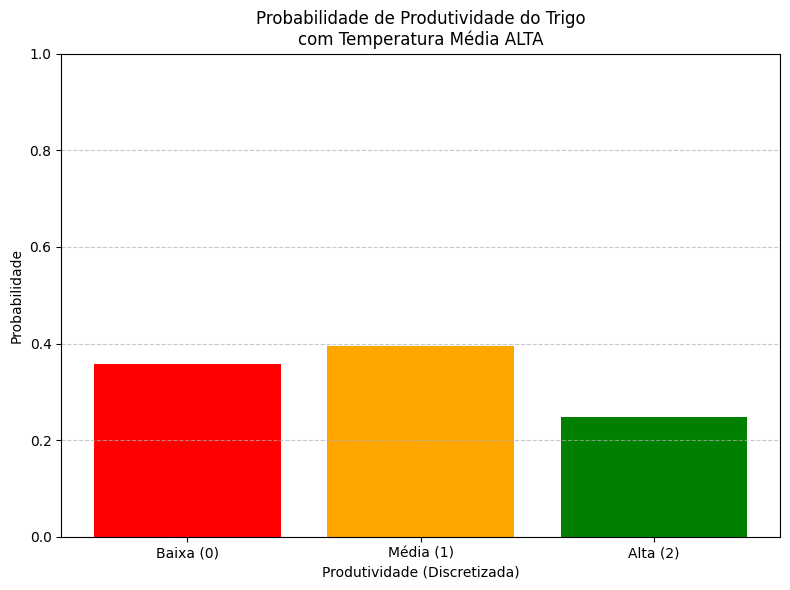

In [ ]:
# Extrair as probabilidades para plotagem
probs_trigo = resultado_trigo_temp_alta.values

# Plotar o gr√°fico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
cores = ['red', 'orange', 'green']  # cores para baixa, m√©dia e alta produtividade

plt.bar(['Baixa (0)', 'M√©dia (1)', 'Alta (2)'], probs_trigo, color=cores)
plt.xlabel("Produtividade (Discretizada)")
plt.ylabel("Probabilidade")
plt.title("Probabilidade de Produtividade do Trigo\ncom Temperatura M√©dia ALTA")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


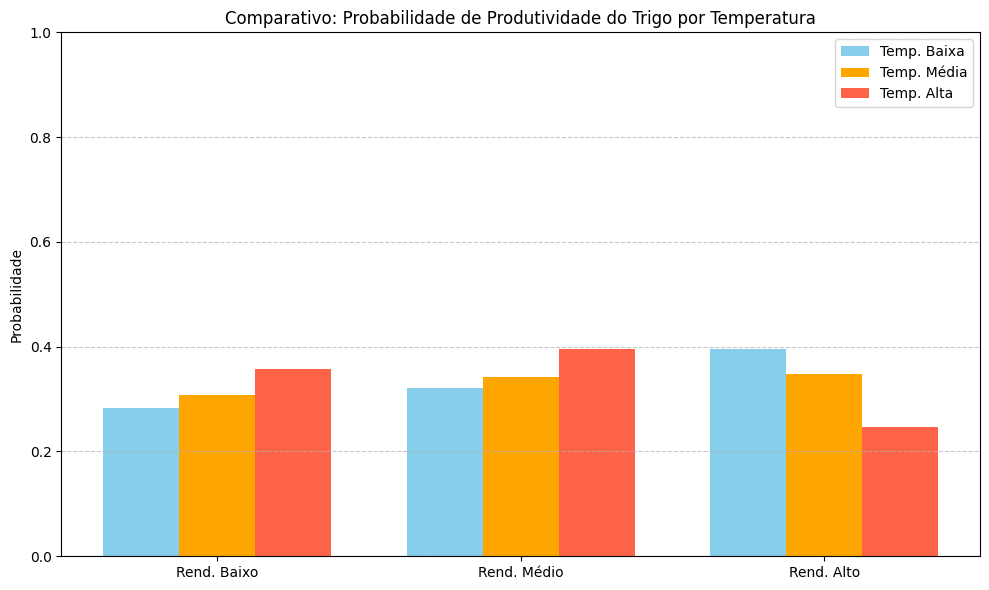

In [ ]:
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

# Obter probabilidades para os tr√™s cen√°rios
probs_baixa = inferencia_trigo.query(
    variables=['Rendimento M√©dio (kg/ha)'],
    evidence={'Temperatura Media': 0}
).values

probs_media = inferencia_trigo.query(
    variables=['Rendimento M√©dio (kg/ha)'],
    evidence={'Temperatura Media': 1}
).values

probs_alta = inferencia_trigo.query(
    variables=['Rendimento M√©dio (kg/ha)'],
    evidence={'Temperatura Media': 2}
).values

# Organizar dados para gr√°fico
categorias = ['Baixa (0)', 'M√©dia (1)', 'Alta (2)']
x = range(len(categorias))
largura = 0.25

# Plotar gr√°fico de barras agrupadas
plt.figure(figsize=(10, 6))
plt.bar([p - largura for p in x], probs_baixa, width=largura, label='Temp. Baixa', color='skyblue')
plt.bar(x, probs_media, width=largura, label='Temp. M√©dia', color='orange')
plt.bar([p + largura for p in x], probs_alta, width=largura, label='Temp. Alta', color='tomato')

plt.xticks(x, ['Rend. Baixo', 'Rend. M√©dio', 'Rend. Alto'])
plt.ylabel('Probabilidade')
plt.title('Comparativo: Probabilidade de Produtividade do Trigo por Temperatura')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-23-26a383c3038f>:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


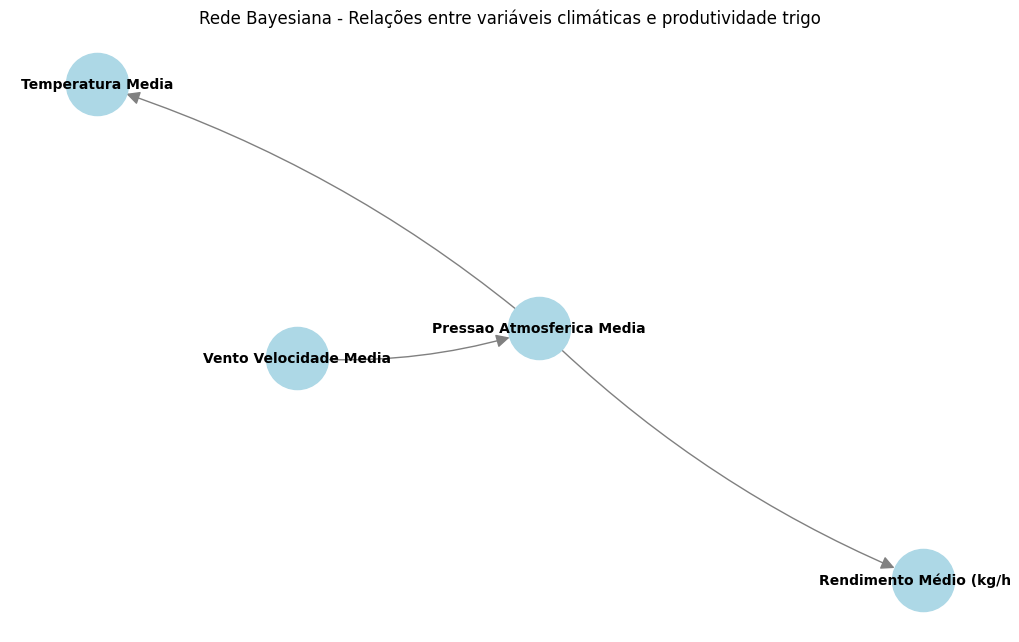

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Criar grafo direcionado com as rela√ß√µes aprendidas para o trigo
G_trigo = nx.DiGraph()
G_trigo.add_edges_from(rede_bayesiana_trigo.edges())

# Layout dos n√≥s
pos = nx.spring_layout(G_trigo, seed=13)

# Plotar grafo com setas vis√≠veis
plt.figure(figsize=(10, 6))
nx.draw(
    G_trigo,
    pos,
    with_labels=True,
    node_color='lightblue',
    node_size=2000,
    font_size=10,
    font_weight='bold',
    arrows=True,
    arrowsize=20,
    edge_color='gray',
    connectionstyle='arc3,rad=0.1'  # Deixa as arestas mais curvas
)

plt.title("Rede Bayesiana - Rela√ß√µes entre vari√°veis clim√°ticas e produtividade trigo")
plt.axis('off')
plt.tight_layout()
plt.show()


## üìà Regress√£o Linear: Temperatura vs Produtividade da Trigo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


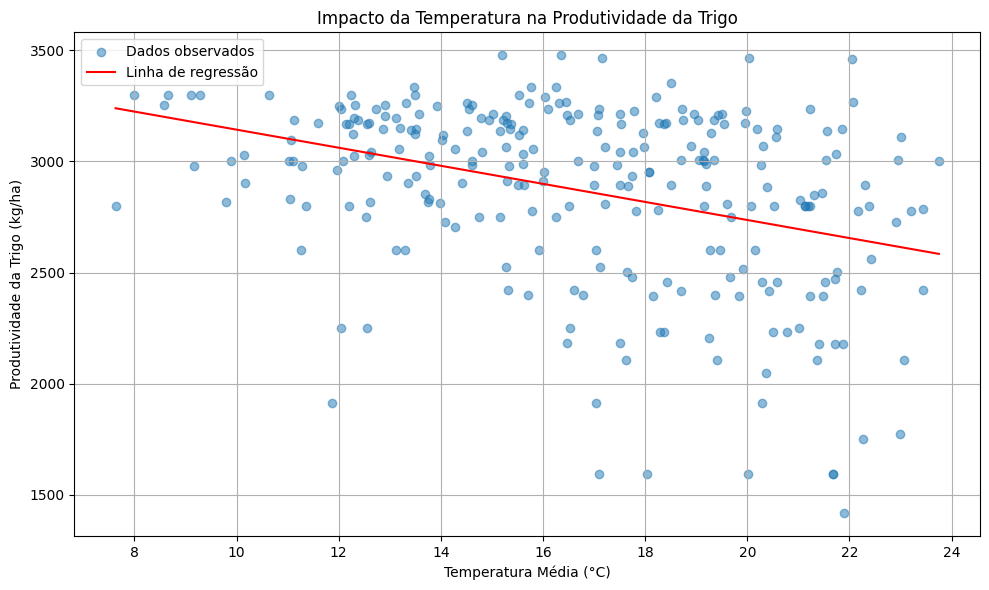

Coeficiente (varia√ß√£o por ¬∞C): -40.64 kg/ha
Intercepto: 3549.60


In [ ]:
from sklearn.linear_model import LinearRegression

# Regress√£o linear
X_trigo = df_trigo[['Temperatura Media']]
y_trigo = df_trigo['Rendimento M√©dio (kg/ha)']

modelo_trigo = LinearRegression()
modelo_trigo.fit(X_trigo, y_trigo)

# Coeficiente e intercepto
coef_temp_trigo = modelo_trigo.coef_[0]
intercepto_trigo = modelo_trigo.intercept_

# Previs√µes para gr√°fico
temperaturas_simuladas_trigo = np.linspace(X_trigo.min(), X_trigo.max(), 100).reshape(-1, 1)
produtividade_prevista_trigo = modelo_trigo.predict(temperaturas_simuladas_trigo)

# Gr√°fico da regress√£o linear
plt.figure(figsize=(10, 6))
plt.scatter(X_trigo, y_trigo, alpha=0.5, label='Dados observados')
plt.plot(temperaturas_simuladas_trigo, produtividade_prevista_trigo, color='red', label='Linha de regress√£o')
plt.xlabel("Temperatura M√©dia (¬∞C)")
plt.ylabel("Produtividade da Trigo (kg/ha)")
plt.title("Impacto da Temperatura na Produtividade da Trigo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Coeficiente (varia√ß√£o por ¬∞C): {coef_temp_trigo:.2f} kg/ha")
print(f"Intercepto: {intercepto_trigo:.2f}")


In [ ]:
# Comparativo entre modelos: Regress√£o Linear x Rede Bayesiana

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from pgmpy.metrics import log_likelihood_score

X = df_trigo[['Temperatura Media', 'Precipitacao Total', 'Pressao Atmosferica Media', 'Vento Velocidade Media']]
y = df_trigo['Rendimento M√©dio (kg/ha)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)
y_pred = modelo_rl.predict(X_test)

mae_rl = mean_absolute_error(y_test, y_pred)
rmse_rl = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rl = r2_score(y_test, y_pred)

score = log_likelihood_score(rede_bayesiana_trigo, df_teste_trigo)

print("### COMPARATIVO DE MODELOS - TRIGO ###")
print(f"Regress√£o Linear -> R¬≤: {r2_rl:.4f} | MAE: {mae_rl:.2f} | RMSE: {rmse_rl:.2f}")
print(f"Rede Bayesiana   -> Log-Likelihood no teste: {score:.2f}")


### COMPARATIVO DE MODELOS - TRIGO ###
Regress√£o Linear -> R¬≤: 0.1468 | MAE: 296.38 | RMSE: 381.17
Rede Bayesiana   -> Log-Likelihood no teste: -337.91


In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from pgmpy.inference import VariableElimination

# Definir valores discretos
valores_discretos = [1, 2, 3]

# Configurar infer√™ncia
infer = VariableElimination(rede_bayesiana_trigo)

# Realizar infer√™ncia para c√°lculo do valor esperado
predicoes = []
reais = df_teste_trigo['Rendimento M√©dio (kg/ha)'].tolist()

for _, row in df_teste_trigo.iterrows():
    evidencia = row.drop('Rendimento M√©dio (kg/ha)').to_dict()
    try:
        dist = infer.query(variables=['Rendimento M√©dio (kg/ha)'], evidence=evidencia).values
        esperado = sum([v * p for v, p in zip(valores_discretos, dist)])
        predicoes.append(esperado)
    except:
        continue

if len(predicoes) < len(reais):
    reais = reais[:len(predicoes)]

# C√°lculo das m√©tricas
mae_bayes = mean_absolute_error(reais, predicoes)
rmse_bayes = mean_squared_error(reais, predicoes) ** 0.5

print(f"MAE da Rede Bayesiana: {mae_bayes:.2f}")
print(f"RMSE da Rede Bayesiana: {rmse_bayes:.2f}")


MAE da Rede Bayesiana: 1.00
RMSE da Rede Bayesiana: 1.22
